In [11]:
import requests
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import torch
from PIL import Image
from transformers import AutoProcessor, AutoModelForZeroShotObjectDetection 

model_id = "IDEA-Research/grounding-dino-tiny"
device = "cuda" if torch.cuda.is_available() else "cpu"

In [12]:
model_id = "IDEA-Research/grounding-dino-tiny"
device = "cuda" if torch.cuda.is_available() else "cpu"

processor = AutoProcessor.from_pretrained(model_id)
model = AutoModelForZeroShotObjectDetection.from_pretrained(model_id).to(device)

In [23]:
def plot_bbox(image, results):
    # Create a figure and axes
    fig, ax = plt.subplots()

    # Display the image
    ax.imshow(image)

    # Extract the first result from the results list
    result = results[0]

    # Plot each bounding box
    for bbox, label in zip(result['boxes'], result['labels']):
        # Unpack the bounding box coordinates
        x1, y1, x2, y2 = bbox.tolist()
        
        # Create a Rectangle patch
        rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=1, edgecolor='r', facecolor='none')
        
        # Add the rectangle to the Axes
        ax.add_patch(rect)
        
        # Annotate the label
        ax.text(x1, y1, label, color='white', fontsize=8, bbox=dict(facecolor='red', alpha=0.5))

    # Remove the axis ticks and labels
    ax.axis('off')

    # Show the plot
    plt.show()



def process_image(image, text, device, processor, model):
    inputs = processor(images=image, text=text, return_tensors="pt").to(device)
    with torch.no_grad():
        outputs = model(**inputs)

    results = processor.post_process_grounded_object_detection(
        outputs,
        inputs.input_ids,
        box_threshold=0.4,
        text_threshold=0.3,
        target_sizes=[image.size[::-1]]
    )
    return results


# Free fire

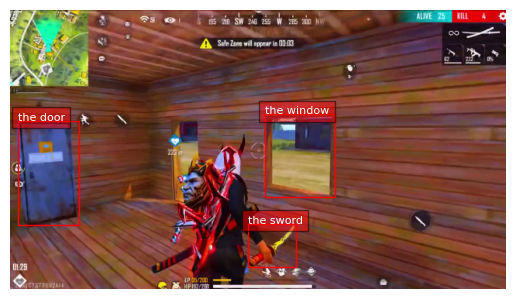

In [49]:
image = Image.open("/Users/sarathmenon/Documents/master_thesis/datasets/game_dataset/raw/free_fire/1.png")


text = "the sword. the door. the window."
results = process_image(image, text, device, processor, model)
plot_bbox(image, results)

# Prince of persia

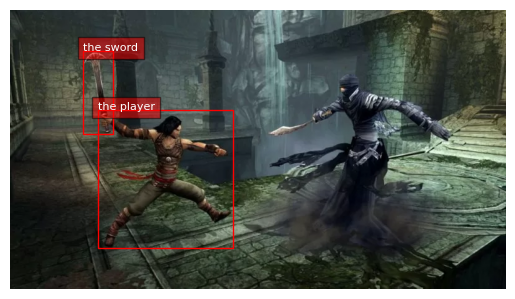

[{'scores': tensor([0.6456, 0.4723]),
  'labels': ['the sword', 'the player'],
  'boxes': tensor([[117.5505,  65.6933, 164.9333, 199.8157],
          [140.7692, 161.1037, 359.2395, 383.3690]])}]

In [47]:
image = Image.open("/Users/sarathmenon/Documents/master_thesis/datasets/game_dataset/raw/pop/1.webp")

text = "the player. the sword."
results = process_image(image, text, device, processor, model)
plot_bbox(image, results)
results

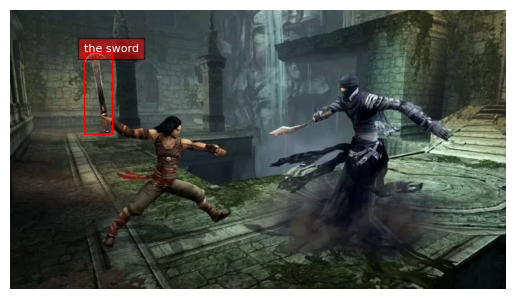

[{'scores': tensor([0.6298]),
  'labels': ['the sword'],
  'boxes': tensor([[118.6693,  66.5697, 163.7616, 199.1534]])}]

In [41]:
image = Image.open("/Users/sarathmenon/Documents/master_thesis/datasets/game_dataset/raw/pop/1.webp")

text = "the sword."
results = process_image(image, text, device, processor, model)
plot_bbox(image, results)
results

# Fortnite

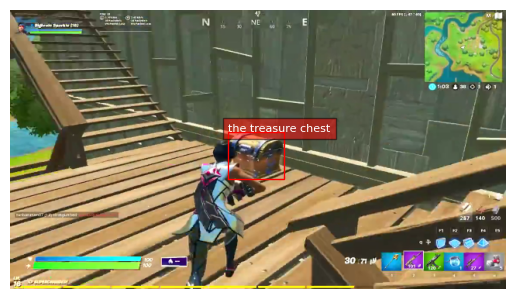

[{'scores': tensor([0.5614]),
  'labels': ['the treasure chest'],
  'boxes': tensor([[281.3506, 156.7516, 353.2715, 218.0553]])}]

In [40]:
image = Image.open("/Users/sarathmenon/Documents/master_thesis/datasets/game_dataset/raw/fortnite/2.png")

text = "the treasure chest."
results = process_image(image, text, device, processor, model)
plot_bbox(image, results)
results

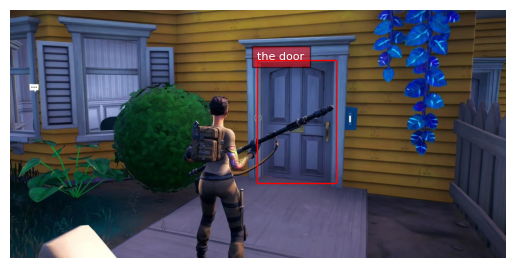

[{'scores': tensor([0.8952]),
  'labels': ['the door'],
  'boxes': tensor([[ 956.8614,  191.9940, 1260.4470,  670.6357]])}]

In [42]:
image = Image.open("/Users/sarathmenon/Documents/master_thesis/datasets/game_dataset/raw/fortnite/1.jpg")

text = "the door."
results = process_image(image, text, device, processor, model)
plot_bbox(image, results)
results